# Loan Default Prediction using Artificial Neural Network

### This notebook predicts loan outcome on Lending Club dataset using Tensorflow & Keras. 

### -   Section 1: Exploratory Data Analysis
### -   Section 2: Data Preprocessing
### -   Section 3: Train-Test Split
### -   Section 4: Creating an ANN Model with TF and Keras
### -   Section 5: Evaluating Model Performance
### -   Section 6: Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Section 1: Exploratory Data Analysis

In [0]:
df_info = pd.read_csv('lending_club_feature_info.csv', index_col='LoanStatNew')

In [251]:
# This df has description of all the features in the LC dataset
df_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [0]:
df = pd.read_csv('lending_club_data.csv')

In [5]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Sep-15,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-05,8,0,25757,100.6,23,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Sep-15,Fully Paid,home_improvement,Home improvement,1.36,Aug-05,8,0,4178,4.9,25,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Sep-12,Fully Paid,credit_card,No More Credit Cards,26.87,Sep-94,11,0,13425,64.5,15,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Oct-14,Fully Paid,debt_consolidation,Debt consolidation,12.52,Jun-94,13,0,18637,32.9,40,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Apr-12,Fully Paid,debt_consolidation,Debt Consolidation,23.69,Dec-97,13,0,22171,82.4,37,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

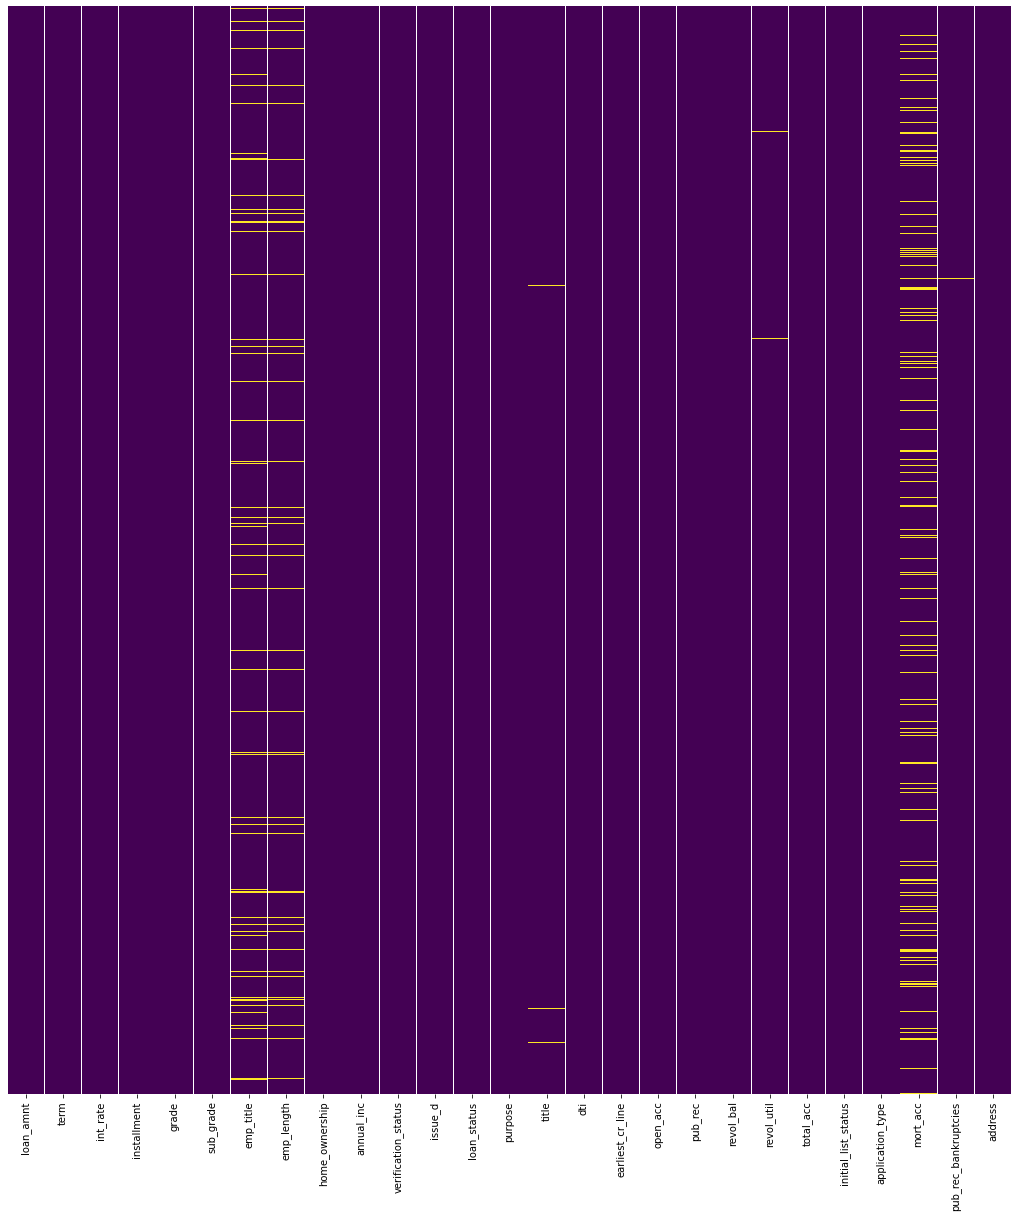

In [7]:
fig, ax = plt.subplots(figsize=(18,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.columns[df.isnull().any()].tolist()

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'mort_acc',
 'pub_rec_bankruptcies']

Let's look at the distribution of target class

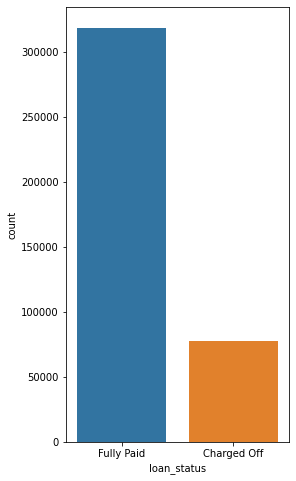

In [9]:
fig, ax = plt.subplots(figsize=(4,8))
sns.countplot(x="loan_status", data=df)

Our target class data is imbalanced. I will address this in Section 3

(0.0, 45000.0)

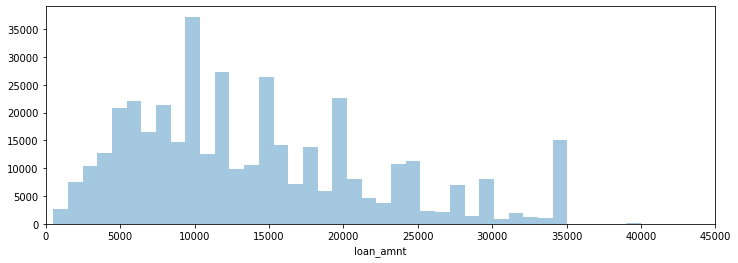

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

(10.0, 0.0)

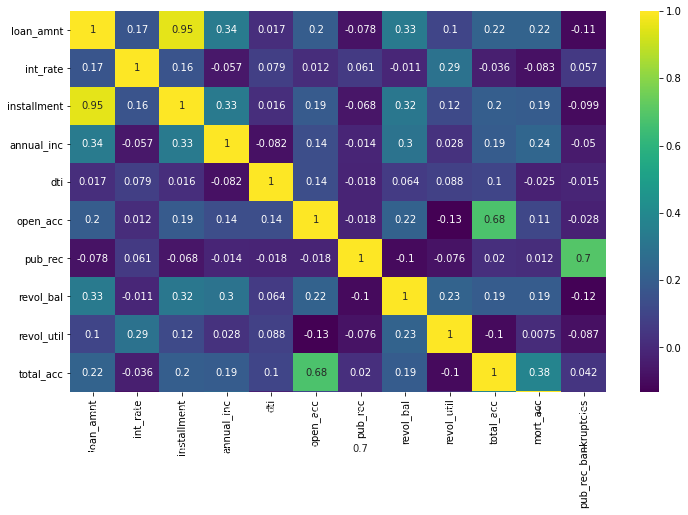

In [11]:
# This only shows all the continous feature variables

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

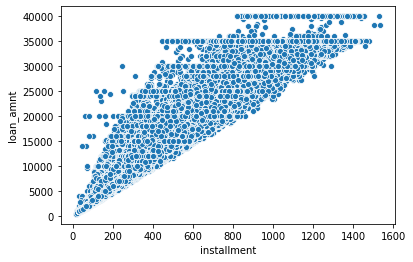

In [12]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

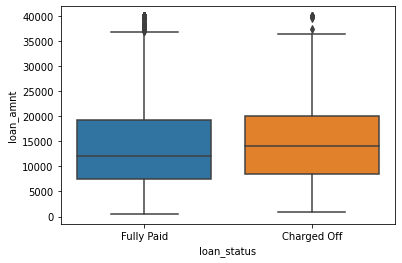

In [13]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's understand how Lending Club assign grades to loans and what do they really mean

In [15]:
df.groupby('grade')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,64187.0,13294.734526,7376.005559,725.0,7500.0,12000.0,18450.0,40000.0
B,116018.0,12895.710795,7393.687894,500.0,7375.0,11200.0,17000.0,40000.0
C,105987.0,13761.337004,8421.998481,500.0,7375.0,12000.0,19000.0,40000.0
D,63524.0,14695.402919,8972.220921,1000.0,7900.0,12775.0,20000.0,40000.0
E,31488.0,17723.595497,9468.414168,1000.0,10150.0,16450.0,25000.0,40000.0
F,11772.0,19211.506116,9349.866049,1000.0,12000.0,19000.0,26000.0,40000.0
G,3054.0,20879.952521,8830.188236,1000.0,13850.0,20000.0,28000.0,36000.0


In [16]:
df.groupby('grade')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,64187.0,7.392854,1.004661,5.32,6.62,7.62,7.90,9.63
B,116018.0,11.223131,1.410997,6.00,10.15,11.14,12.12,14.09
C,105987.0,14.317992,1.275851,6.00,13.35,14.31,15.27,17.27
D,63524.0,17.484528,1.342437,6.00,16.55,17.57,18.49,21.49
E,31488.0,20.283007,1.647764,6.00,18.99,20.30,21.48,26.24
F,11772.0,23.701144,1.619788,6.00,22.99,23.83,24.50,30.74
G,3054.0,25.904352,1.865331,6.00,25.80,25.83,26.77,30.99


In [17]:
df.groupby('grade')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,64187.0,408.123876,228.277996,19.87,228.6300,365.940,563.2300,1253.28
B,116018.0,401.774645,226.209137,16.08,236.2000,342.790,514.6500,1318.86
C,105987.0,419.454203,251.856233,16.47,242.1500,353.400,535.7100,1398.20
D,63524.0,451.851504,269.872507,23.51,259.5425,385.000,589.9225,1451.12
E,31488.0,519.917415,275.117970,24.73,312.8425,480.105,690.1900,1527.00
F,11772.0,571.571673,271.340994,27.82,363.6900,552.350,771.3950,1533.81
G,3054.0,640.566146,271.857901,35.11,427.8950,598.030,856.3025,1479.49


Looks like interest rate and installment plays a role in deciding the grade

Lets convert Loan Status column to numeric 

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [0]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

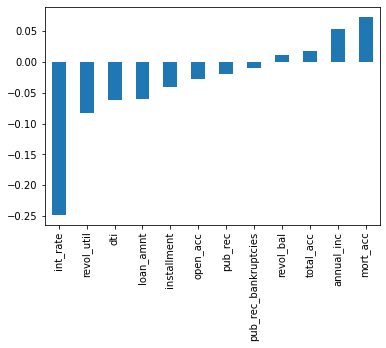

In [20]:
loan_repaid_corr = df.corr()['loan_repaid'].sort_values()
loan_repaid_corr.drop('loan_repaid').plot(kind='bar')

Loan repaid has a strong negative correlation with interest rate, which makes sense

# Section 2: Data Preprocessing

In [21]:
missing_val_featues = df.columns[df.isnull().any()].tolist()
missing_val_featues

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'mort_acc',
 'pub_rec_bankruptcies']

In [22]:
# Percentage of missing values
df[missing_val_featues].isnull().sum()/len(df) * 100

emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

------------------------------
### Employement Title:


In [23]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [24]:
df['emp_title'].nunique()

173103

It's too many unique values for one-hot encoding, so I'll drop the column

In [0]:
df = df.drop('emp_title', axis=1)

------------------------------
### Employement Length:

In [26]:
df['emp_length'].nunique()

11

In [27]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [28]:
df['emp_length'].value_counts().sort_values()

9 years       15314
8 years       19168
7 years       20819
6 years       20841
4 years       23952
1 year        25882
5 years       26495
3 years       31665
< 1 year      31725
2 years       35827
10+ years    126041
Name: emp_length, dtype: int64

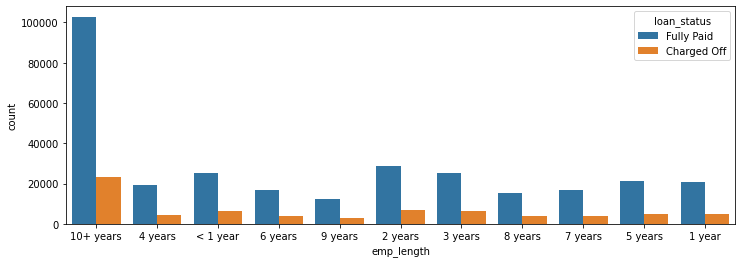

In [29]:
plt.figure(figsize = (12,4))
sns.countplot(x='emp_length', data=df, hue='loan_status')

In [30]:
df_grp = df.groupby('emp_length')['loan_repaid'].value_counts().unstack().fillna(0)
df_grp

loan_repaid,0,1
emp_length,,
1 year,5154,20728
10+ years,23215,102826
2 years,6924,28903
3 years,6182,25483
4 years,4608,19344
5 years,5092,21403
6 years,3943,16898
7 years,4055,16764
8 years,3829,15339


In [31]:
df_grp['charged_off_perc'] = df_grp[0] / (df_grp[1]+ df_grp[0]) * 100
df_grp

loan_repaid,0,1,charged_off_perc
emp_length,,,
1 year,5154,20728,19.913453
10+ years,23215,102826,18.418610
2 years,6924,28903,19.326206
3 years,6182,25483,19.523133
4 years,4608,19344,19.238477
5 years,5092,21403,19.218721
6 years,3943,16898,18.919438
7 years,4055,16764,19.477400
8 years,3829,15339,19.976002


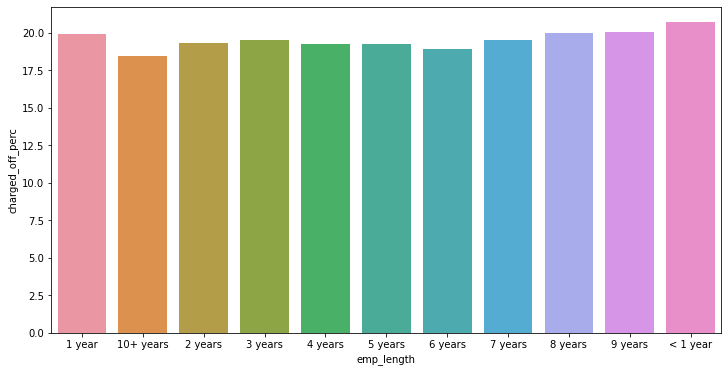

In [32]:
plt.figure(figsize = (12,6))
sns.barplot(x=df_grp.index, y="charged_off_perc", data=df_grp)

Seems like there's no relation between emp_length and loan_status so I'll drop this feature

In [0]:
df = df.drop('emp_length', axis=1)

------------------------------
### Employement Title:

first let's find out what 'title' feature is

In [34]:
df_info.loc['title']

Description    The loan title provided by the borrower
Name: title, dtype: object

Since title and purpose conveys the same info, I'll drop title

In [0]:
df = df.drop('title', axis=1)

------------------------------
### Revolving line utilization rate:

In [36]:
print(df_info.loc['revol_util'])

Description    Revolving line utilization rate, or the amount...
Name: revol_util, dtype: object


[(0.0, 650.0)]

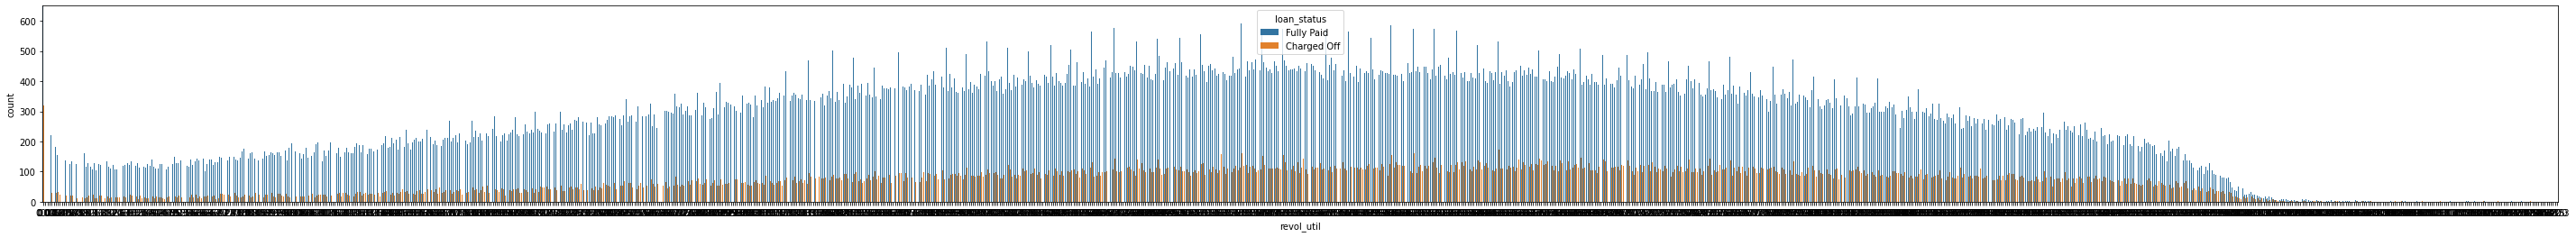

In [37]:
plt.figure(figsize = (50,4))
ax = sns.countplot(x='revol_util', data=df, hue='loan_status')
ax.set(ylim=(0,650))

The graph isn't very clear but it can be seen that revol_util doesn't have a strong effect on loans being charged off

In [0]:
df = df.drop('revol_util', axis=1)

------------------------------
### pub_rec_bankruptcies:

In [39]:
print(df_info.loc['pub_rec_bankruptcies'])    

Description    Number of public record bankruptcies
Name: pub_rec_bankruptcies, dtype: object


In [40]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [41]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

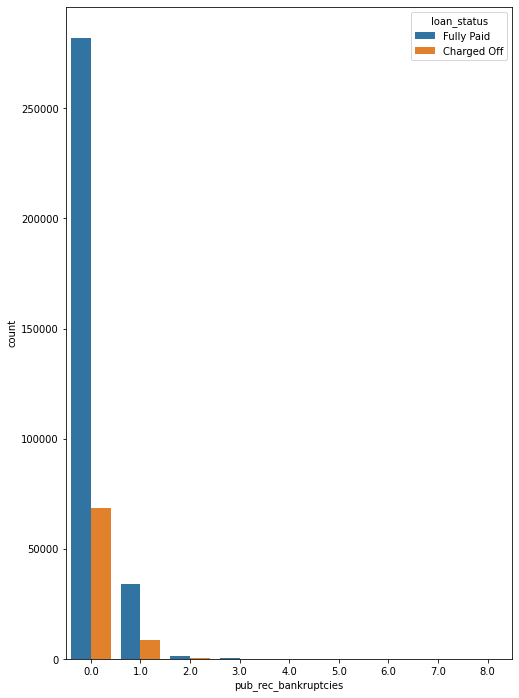

In [42]:
plt.figure(figsize = (8,12))
ax = sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')
# ax.set(ylim=(0,650))

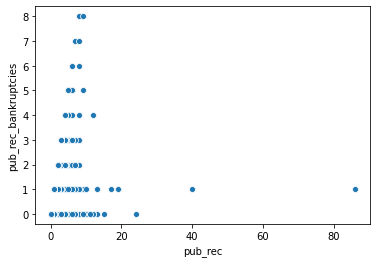

In [43]:
sns.scatterplot(x='pub_rec',y='pub_rec_bankruptcies',data=df)

In [44]:
df[df['pub_rec_bankruptcies'].isnull()]['pub_rec'].value_counts()

0    517
1     17
2      1
Name: pub_rec, dtype: int64

In [0]:
def fill_missing_vals(x, y, avg_series):
    '''
    Accepts x and y values for the row.
    Checks if the y is NaN , if so, it returns the avg value of y for x
    '''
    if np.isnan(y):
        return avg_series[x]
    else:
        return y

In [46]:
pub_rec_bankruptcies_avg = np.round(df.groupby('pub_rec').mean()['pub_rec_bankruptcies'], 0)
pub_rec_bankruptcies_avg

pub_rec
0     0.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    0.0
11    0.0
12    1.0
13    0.0
15    0.0
17    1.0
19    1.0
24    0.0
40    1.0
86    1.0
Name: pub_rec_bankruptcies, dtype: float64

In [0]:
df['pub_rec_bankruptcies'] = df.apply(lambda x: fill_missing_vals(x['pub_rec'], x['pub_rec_bankruptcies'], avg_series=pub_rec_bankruptcies_avg), axis=1)

In [48]:
df[df['pub_rec_bankruptcies'].isnull()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid


------------------------------
### mort_acc:

In [49]:
print(df_info.loc['mort_acc'])

Description    Number of mortgage accounts.
Name: mort_acc, dtype: object


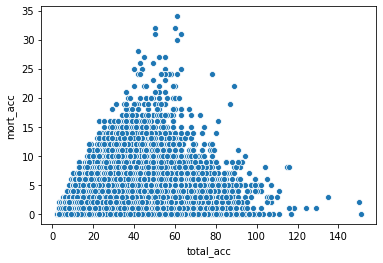

In [50]:
sns.scatterplot(x='total_acc',y='mort_acc',data=df)

In [51]:
df[df['mort_acc'].isnull()]['total_acc'].value_counts()

17    1437
16    1427
15    1424
21    1386
13    1367
      ... 
72       1
73       1
81       1
80       1
87       1
Name: total_acc, Length: 79, dtype: int64

In [52]:
mort_acc_avg = df.groupby('total_acc').mean()['mort_acc']
mort_acc_avg

total_acc
2      0.000000
3      0.052023
4      0.066743
5      0.103289
6      0.151293
         ...   
124    1.000000
129    1.000000
135    3.000000
150    2.000000
151    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [0]:
df['mort_acc'] = df.apply(lambda x: fill_missing_vals(x['total_acc'], x['mort_acc'], mort_acc_avg), axis=1)

In [54]:
df[df['mort_acc'].isnull()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid


---
## Categorical Variables and Dummy Variables
---

In [55]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term

In [56]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [0]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [58]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

### grade

In [59]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

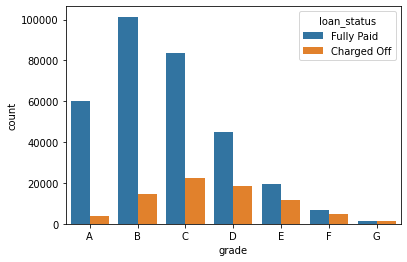

In [60]:
sorted_grade = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,hue='loan_status', order=sorted_grade)

In [61]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

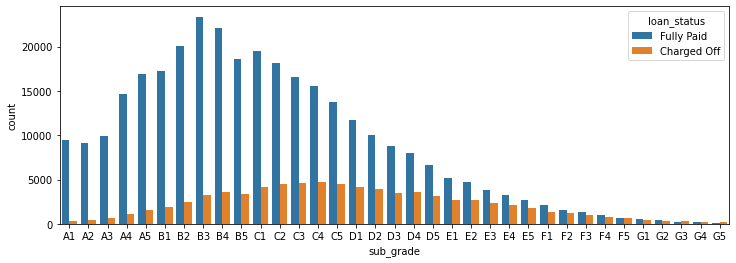

In [62]:
sorted_sub_grade = sorted(df['sub_grade'].unique())

plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df, order=sorted_sub_grade, hue='loan_status')

##### Since Sub-Grade is detailed version on Grade, I will drop grade and categorize sub-grade as nominal feature. I don't know exactly how grade and sub-grade are assigned and if they are ordinal 

In [0]:
df = df.drop('grade',axis=1)

In [0]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [0]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

### home_ownership

In [67]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [0]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [0]:
subgrade_home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)

In [0]:
df = pd.concat([df.drop('home_ownership',axis=1),subgrade_home_ownership],axis=1)

### verification_status

In [71]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [72]:
print(df_info.loc['verification_status'])

Description    Indicates if income was verified by LC, not ve...
Name: verification_status, dtype: object


In [0]:
verification_status_dummies = pd.get_dummies(df['verification_status'],drop_first=True)

In [0]:
df = pd.concat([df.drop('verification_status',axis=1),verification_status_dummies],axis=1)

### issue_d

In [75]:
df['issue_d'].value_counts()

Oct-14    14846
Jul-14    12609
Jan-15    11705
Dec-13    10618
Nov-13    10496
          ...  
Aug-07       26
Sep-08       25
Nov-07       22
Sep-07       15
Jun-07        1
Name: issue_d, Length: 115, dtype: int64

##### I will drop this feature as loan issue date doesn't have to do much with the loan status 

In [0]:
df = df.drop('issue_d', axis=1)

### loan_status

##### I made a loan_repaid feature back in Section 1 and that will be the target class. loan_status can be dropped

In [0]:
df = df.drop('loan_status', axis=1)

### purpose

In [78]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [0]:
purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)

In [0]:
df = pd.concat([df.drop('purpose',axis=1),verification_status_dummies],axis=1)

### earliest_cr_line

In [81]:
df['earliest_cr_line']

0         Jun-90
1         Jul-04
2         Aug-07
3         Sep-06
4         Mar-99
           ...  
396025    Nov-04
396026    Feb-06
396027    Mar-97
396028    Nov-90
396029    Sep-98
Name: earliest_cr_line, Length: 396030, dtype: object

In [0]:
# df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

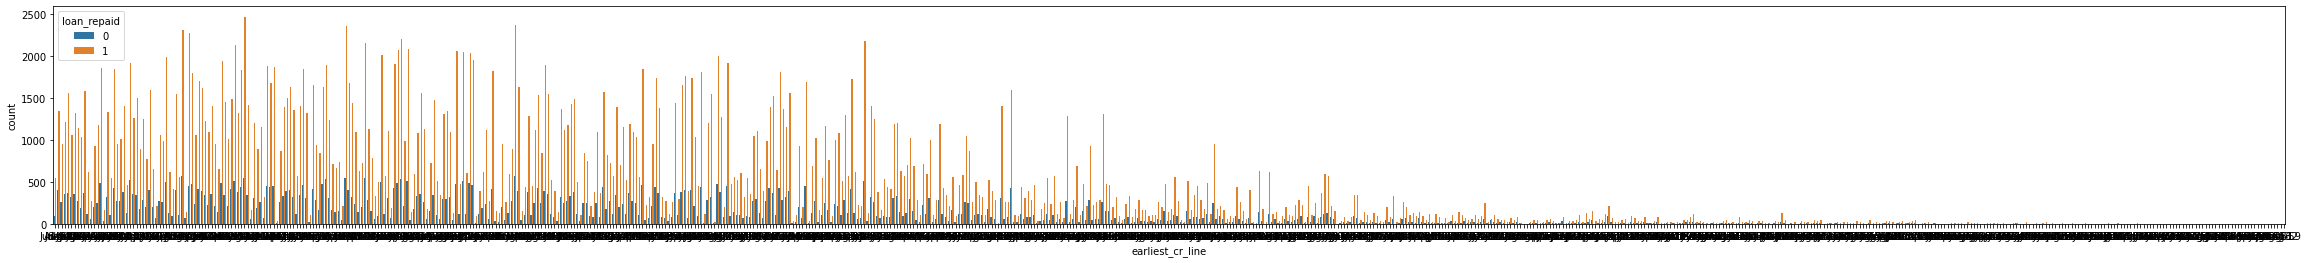

In [83]:
plt.figure(figsize=(40,4))
sns.countplot(x='earliest_cr_line',data=df, hue='loan_repaid')

##### Given that there's on visible trend, I will drop this feature as well

In [0]:
df = df.drop('earliest_cr_line', axis=1)

initial_list_status

In [85]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [86]:
df_info.loc['initial_list_status']['Description']

'The initial listing status of the loan. Possible values are – W, F'

In [0]:
init_list_status_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)

In [0]:
df = pd.concat([df.drop('initial_list_status',axis=1),init_list_status_dummies],axis=1)

application_type

In [89]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [0]:
application_type_dummies = pd.get_dummies(df['application_type'],drop_first=True)

In [0]:
df = pd.concat([df.drop('application_type',axis=1),application_type_dummies],axis=1)

address

In [92]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

Address could have an impact depending on the kind of neighboorhood so I'll just extrac the zip code

In [0]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [94]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 396030, dtype: object

In [0]:
df = df.drop('address', axis=1)

In [96]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT', 'Source Verified',
       'Verified', 'Source Verified', 'Verified', 'w', 'INDIVIDUAL', 'JOINT',
       'zip_code'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   dti                   396030 non-null  float64
 6   open_acc              396030 non-null  int64  
 7   pub_rec               396030 non-null  int64  
 8   revol_bal             396030 non-null  int64  
 9   total_acc             396030 non-null  int64  
 10  mort_acc              396030 non-null  float64
 11  pub_rec_bankruptcies  396030 non-null  float64
 12  loan_repaid           396030 non-null  int64  
 13  A2                    396030 non-null  uint8  
 14  A3                    396030 non-null  uint8  
 15  

No more missing values so we're good to go for that next step

# Section 3: Train-Test Split

In [129]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

print(X.shape)
print(y.shape)

(396030, 57)
(396030,)


In [122]:
# Loan Repaid
df[df['loan_repaid'] == 1].shape

(318357, 58)

In [124]:
# Loan Default
df[df['loan_repaid'] == 0].shape

(77673, 58)

### Balancing the data

Undersampling didn't result in good model performance. Precision and recall was below 0.90. Oversampling on he other hand, yield much better results

In [0]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [156]:
smk = SMOTETomek(random_state=42)
X_bal,y_bal=smk.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [157]:
X_bal.shape, y_bal.shape

((606932, 57), (606932,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.20, random_state=101)

### Normalizing the data

Need to scale data for the ANN model

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

# Section 4: Creating an ANN Model with TF and Keras

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

##### There are many ways a Neural Network can be designed. I went through some discussions to get an idea what the structure should be like. The idea is to start with a layer with number of nodes = no. of features and then reduce or half the number of nodes in the following layers so the result converge

In [165]:
X_train.shape

(485545, 57)

57 -> 28 > 14 > 7 > 1

*   Setting my activation function to Rectified Linear Unit
*   Adding a dropout of 20% to avoid overfitting
*   Final level activation function will be sigmoid since its a binary classifier
*   For optimizer I'm going with Adam since it's the most frquently used

In [0]:
model = Sequential()

# input layer
model.add(Dense(57,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(14, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


I played around with number of epochs and batch size to get the optimal result

In [233]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=200,
          validation_data=(X_test, y_test), 
          )

Epoch 1/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.4512 - val_loss: 0.3142
Epoch 2/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.3298 - val_loss: 0.2679
Epoch 3/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.3006 - val_loss: 0.2595
Epoch 4/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.2886 - val_loss: 0.2509
Epoch 5/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.2795 - val_loss: 0.2487
Epoch 6/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.2732 - val_loss: 0.2370
Epoch 7/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.2667 - val_loss: 0.2271
Epoch 8/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.2577 - val_loss: 0.2206
Epoch 9/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.2472 - val_loss: 0.2101
Epoch 10/50
2428/2428 [==============================] - 5s 2ms/step - loss: 0.240

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('LC_binary_classifier_model.h5')

# Section 5: Evaluating Model Performance

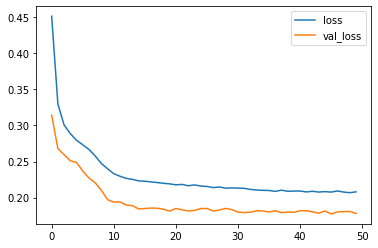

In [236]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [239]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     60488
           1       0.87      1.00      0.93     60899

    accuracy                           0.93    121387
   macro avg       0.94      0.93      0.93    121387
weighted avg       0.94      0.93      0.93    121387



In [245]:
confusion_matrix(y_test,predictions)

array([[51770,  8718],
       [   62, 60837]])

# Section 6: Prediction


I will select a random row from that data and apply that on my model to see the result

In [0]:
import random
random.seed(101)

In [0]:
random_ind = random.randint(0,len(df))

In [0]:
sample_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
sample_customer = scaler.transform(sample_customer.values.reshape(1,57))

In [249]:
model.predict_classes(sample_customer)

array([[1]], dtype=int32)

Prediction is 1, meaning loan will be repaid

Now let's check the actual loan status for that row 

In [250]:
df.iloc[random_ind]['loan_repaid']

1

So the loan was repaid